<a href="https://colab.research.google.com/github/SIVARAMARAJUCODE/Capstone_project-credit-card-/blob/main/Predicting_Health_Insurance_Price_for_an_individual_or_family.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The majority of the countries finalize health insurance costs based on many factors such as age, number of people in families, etc. What should be the actual health insurance price for an individual or a family is an issue for many companies. Hence, one insurance company hired you as a data scientist to predict the health insurance cost for possible future customers. They have already collected samples required to perform all data analysis and machine learning tasks. Your task is to perform all data analysis steps and finally create a machine learning model which can predict the health insurance cost.

In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import plotly.express as px

In [ ]:
# Now you can proceed with your analysis using the 'data' DataFrame
data = pd.read_excel('/content/Health_insurance_cost.xlsx')

Exploratory Data Analysis

In [ ]:
data.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.tail()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1333,50.0,male,30.97,3,no,northwest,10600.5483
1334,18.0,female,31.92,0,no,northeast,2205.9808
1335,18.0,female,36.85,0,no,southeast,1629.8335
1336,21.0,female,25.80,0,no,southwest,2007.9450
1337,61.0,female,29.07,0,yes,northwest,29141.3603


There are missing values in the form of NaN.

In our dataset age , gender , BMI , Children , smoking_status , location are Independent Variables.

health_insurance_price is dependent Variable which is dependent on Independent Variables

 we can see that health_insurance_price is continous Dependent Variable , So this is Regression Problem

In [ ]:
#exploring the number of observations and variables
data.shape

(1338, 7)

In [ ]:
#getting ststistical summary of dataset
data.describe(include = 'all')

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


Data is okay to be deal with and we can see as MIN and MAX are possible values, there may be outsider but data does't contain missing/incorrect values

Smoking status also have two differnt values with yes or no

and there are 4 different locations.

In [ ]:
# checking null values and datatypes of featres
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


we can observer tat we have 3 features with categorical data, 4 features with numerical data, health insurance price is the target variable, we have 2 null values in target variable

In [ ]:
# to get total no.of.null values are there
data.isna().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [ ]:
# checking for dupliacated and dropping duplocates
data.drop_duplicates()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Univariate Analysis

In [ ]:
# creating histogram for life expectancy with 20 bins
fig = px.histogram(data, x="age", nbins=50, width=800, height=400, labels={"age": "Age Distribution"})
fig.show()

People applying for Health Insurance is highest in number with age group 19-20

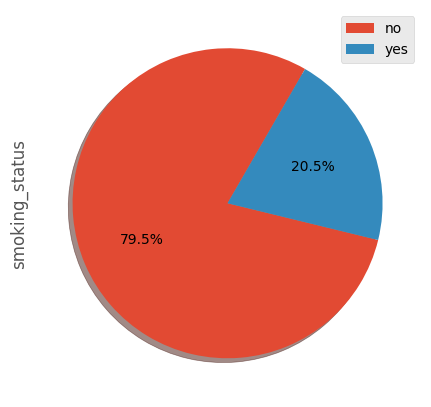

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = [5,6])
data['smoking_status'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
plt.legend()

We can understand that 80% customers are non-smokers who are applying for Health Insurance

Total no of non-smokers applying for Health insurance are maximum

In [ ]:
# creating histogram for life expectancy with 20 bins
fig = px.histogram(data, x="gender", width=400, height=350, labels={"gender": "Gender Distribution"})
fig.show()

In [ ]:
# creating histogram for life expectancy with 20 bins
fig = px.histogram(data, x="BMI" ,width=800, height=400, labels={"BMI": "BMI of Customers"})
fig.show()


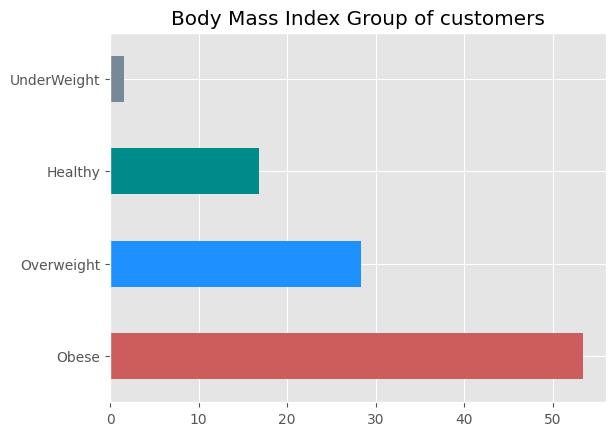

In [ ]:
# binning 'BMI' and Creating new column "BMI_range"
data['BMI_range']= pd.cut(data['BMI'], [0,18.5,24.9,29.9,100],labels=['UnderWeight','Healthy','Overweight','Obese'])
(data['BMI_range'].value_counts(normalize=True)*100).plot.barh(title ="Body Mass Index Group of customers", color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen' ])
plt.xticks(rotation=0)
plt.show()

Normal BMI Range = 18.5 - 24.9
The Overweight and obese Group are the largest group applying for health insurance.
This can affct the insurance Price the person get.

In [ ]:
# creating histogram for life expectancy with 20 bins
fig = px.histogram(data, x="Children", width=800, height=400, labels={"Children": "Number of Childrens"})
fig.show()

Customers Applying for Health Insurance who have NO CHILDREN are maximum.

In [ ]:
# creating histogram for life expectancy with 20 bins
fig = px.histogram(data, x="location", width=800, height=400, labels={"location": "Location of Customers"})
fig.show()

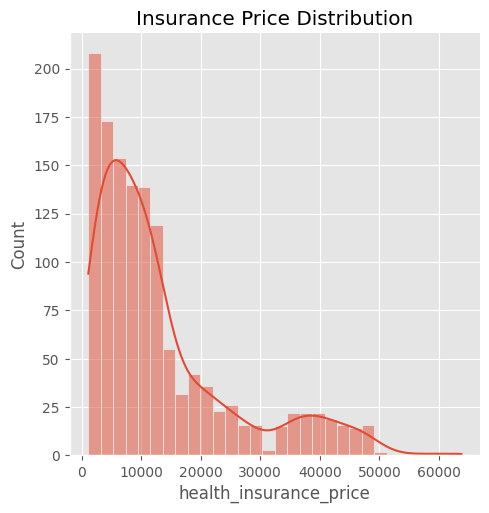

In [ ]:
# Distribution of charges value
sns.displot(data['health_insurance_price'], kde=True)  # kde=True adds the kernel density estimate
plt.title('Insurance Price Distribution')
plt.show()


We have a lot of data disturbuted between 10,000 we have little values in 30,000 - 40,000

Checking for Outliers

In [ ]:
fig = px.box(data, y="age", width=400, height=300)
fig.show()


Data is normally distributed. Min - 18 & Max - 64

In [ ]:
fig = px.box(data, y="BMI", width=400, height=300)
fig.show()

There are outliers in BMI Data , But these are not incorrect data as these are possible so we will keep as it is.

In [ ]:
fig = px.box(data, y="health_insurance_price", width=400, height=300)
fig.show()

There are outliers too , but again these are possible data.

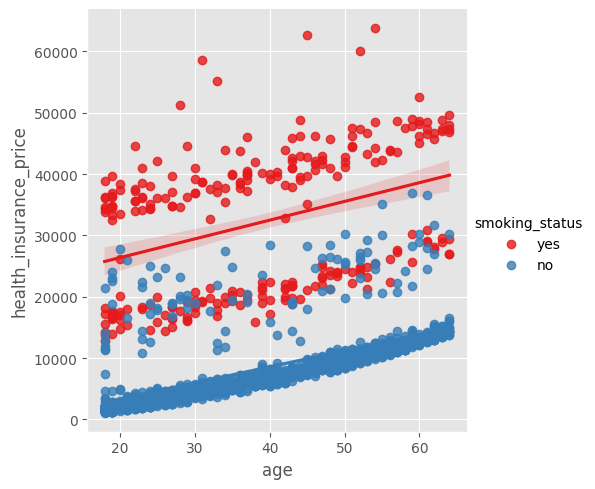

In [ ]:
ax = sns.lmplot(x = 'age', y = 'health_insurance_price', data=data, hue='smoking_status', palette='Set1')

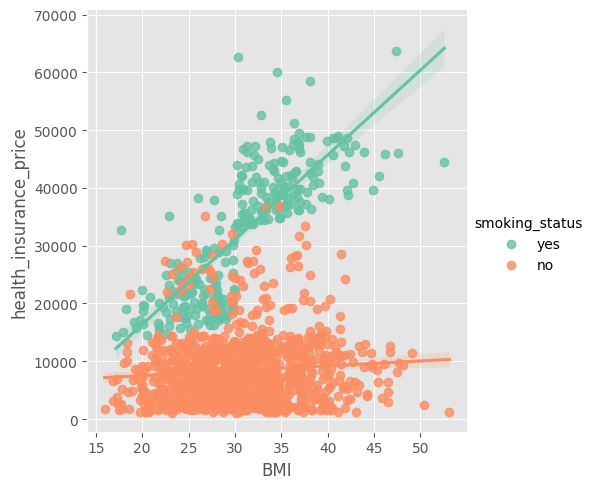

In [ ]:
ax = sns.lmplot(x = 'BMI', y = 'health_insurance_price', data=data, hue='smoking_status', palette='Set2')


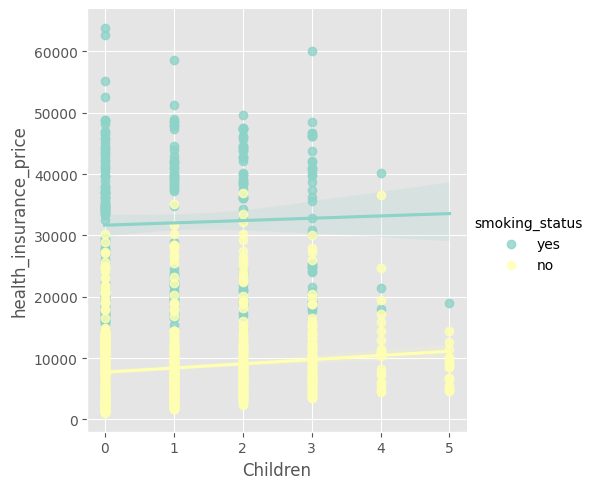

In [ ]:
ax = sns.lmplot(x = 'Children', y = 'health_insurance_price', data=data, hue='smoking_status', palette='Set3')

We can clearly see thta Smoking has serious effect on health insurance price

<ipython-input-19-aee9e58453c5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr(method='spearman').abs()


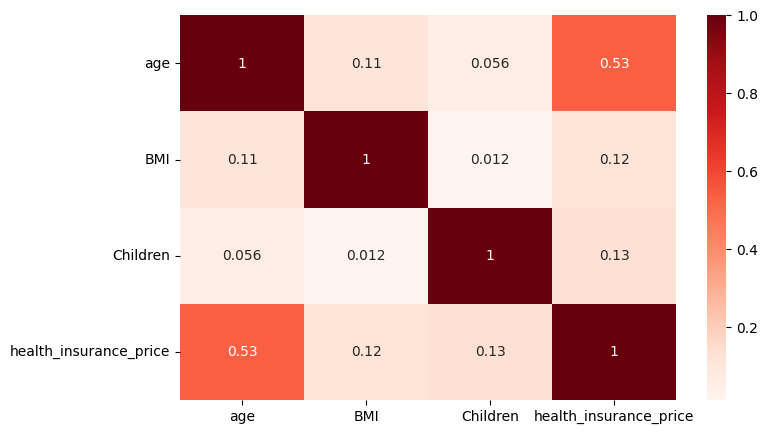

In [ ]:
#First we will do a correlation matrix heatmap to see the correlation coefficient for each pair of features

corr_matrix = data.corr(method='spearman').abs()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="Reds")
plt.show()

We can see that Health Insurance Price are strong connected with age and if the person is smoker or not

In [ ]:
data.groupby("smoking_status").agg({"health_insurance_price": "mean"})

,health_insurance_price
smoking_status,
no,8437.935287
yes,32077.757594


Observations

We can see that changes in the amount of health insurance price for smokers and non-smokers

There is a huge difference between both of the groups

Dealing with null values


we have null values in three features Age, BMI and health insurance price, so we can't impuye null values. so i am removing it.


In [ ]:
data[data['health_insurance_price'].isnull()]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1281,47.0,female,27.645,2,yes,northwest,NaN
1312,34.0,male,42.900,1,no,southwest,NaN


In [ ]:
# dropping both records
data.dropna(subset =['health_insurance_price'], inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1308 non-null   float64
 1   gender                  1336 non-null   object 
 2   BMI                     1313 non-null   float64
 3   Children                1336 non-null   int64  
 4   smoking_status          1336 non-null   object 
 5   location                1336 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.5+ KB


In [ ]:
data.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     0
dtype: int64

In [ ]:
pip install missingno

<Axes: >

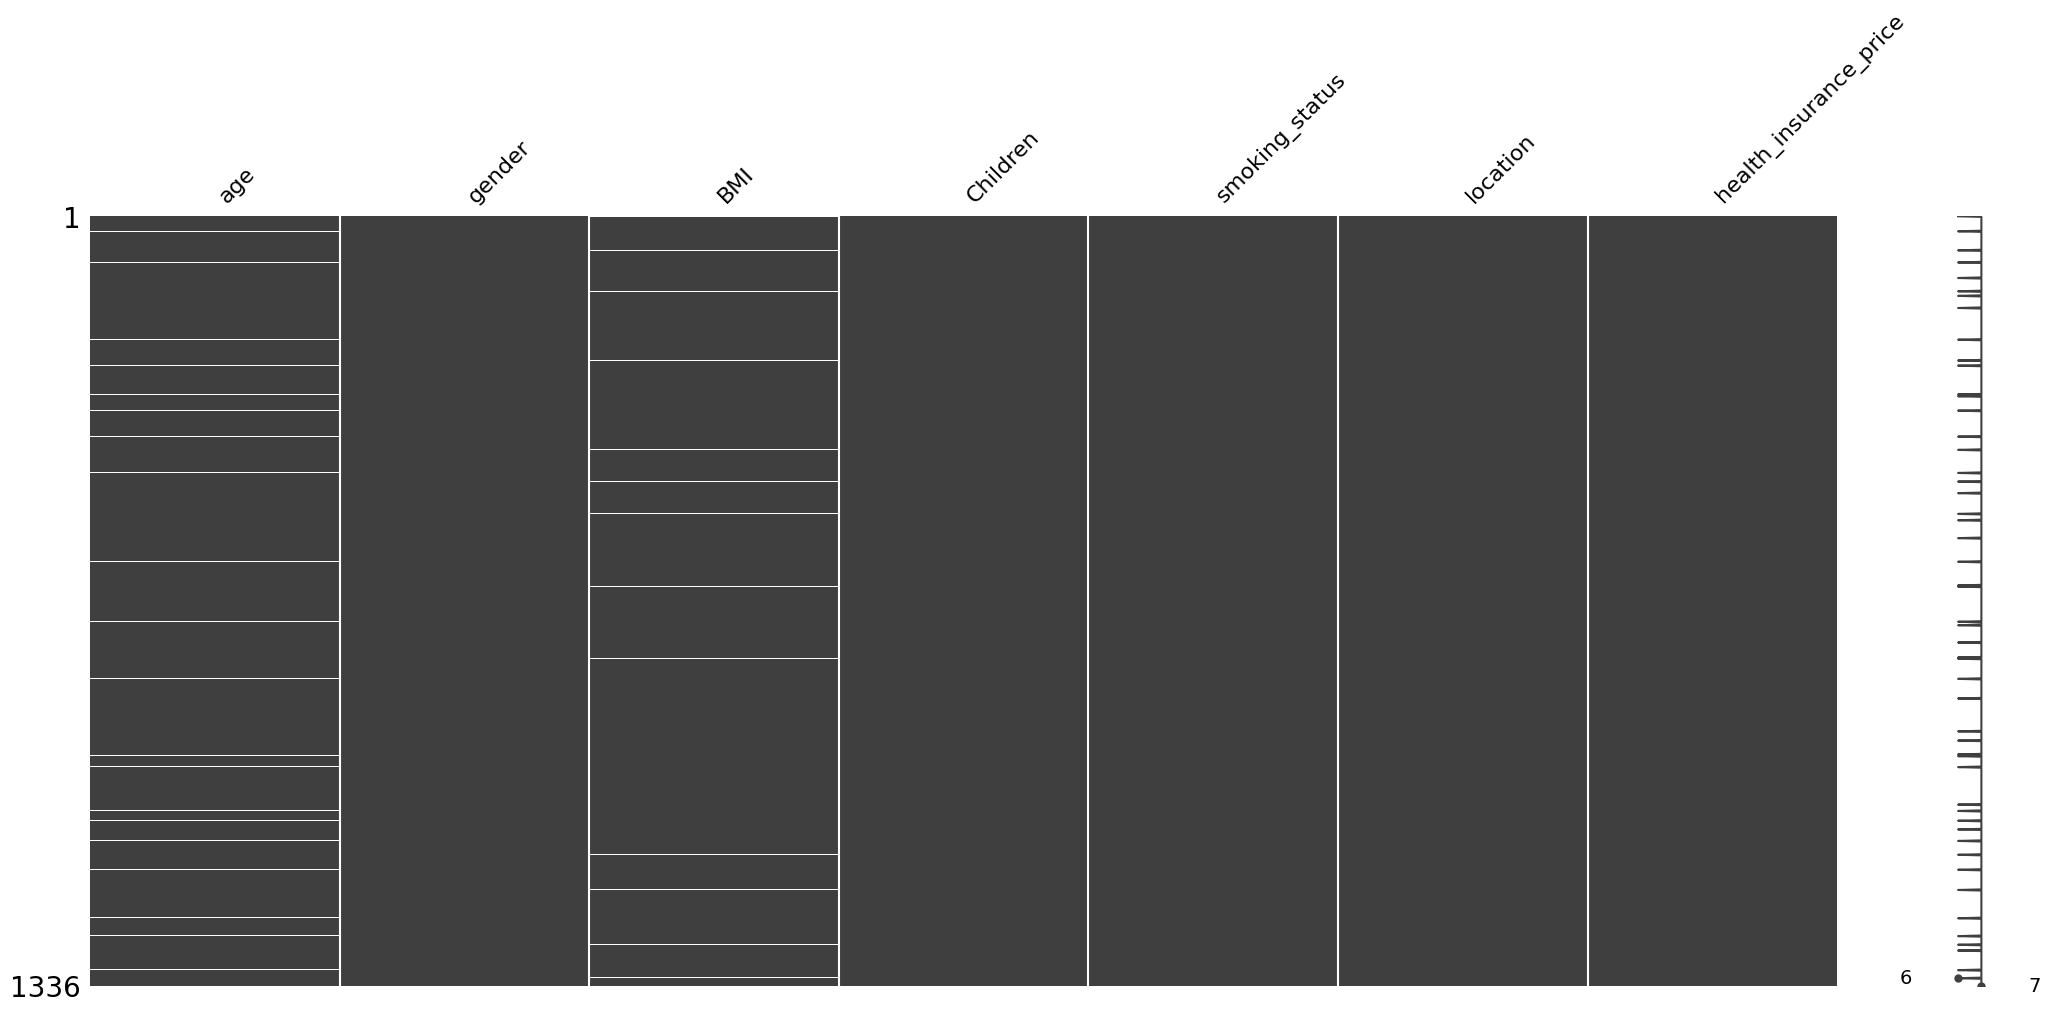

In [ ]:
# Visualizating of missing numbers
import missingno as msno
msno.matrix(data)

<Axes: >

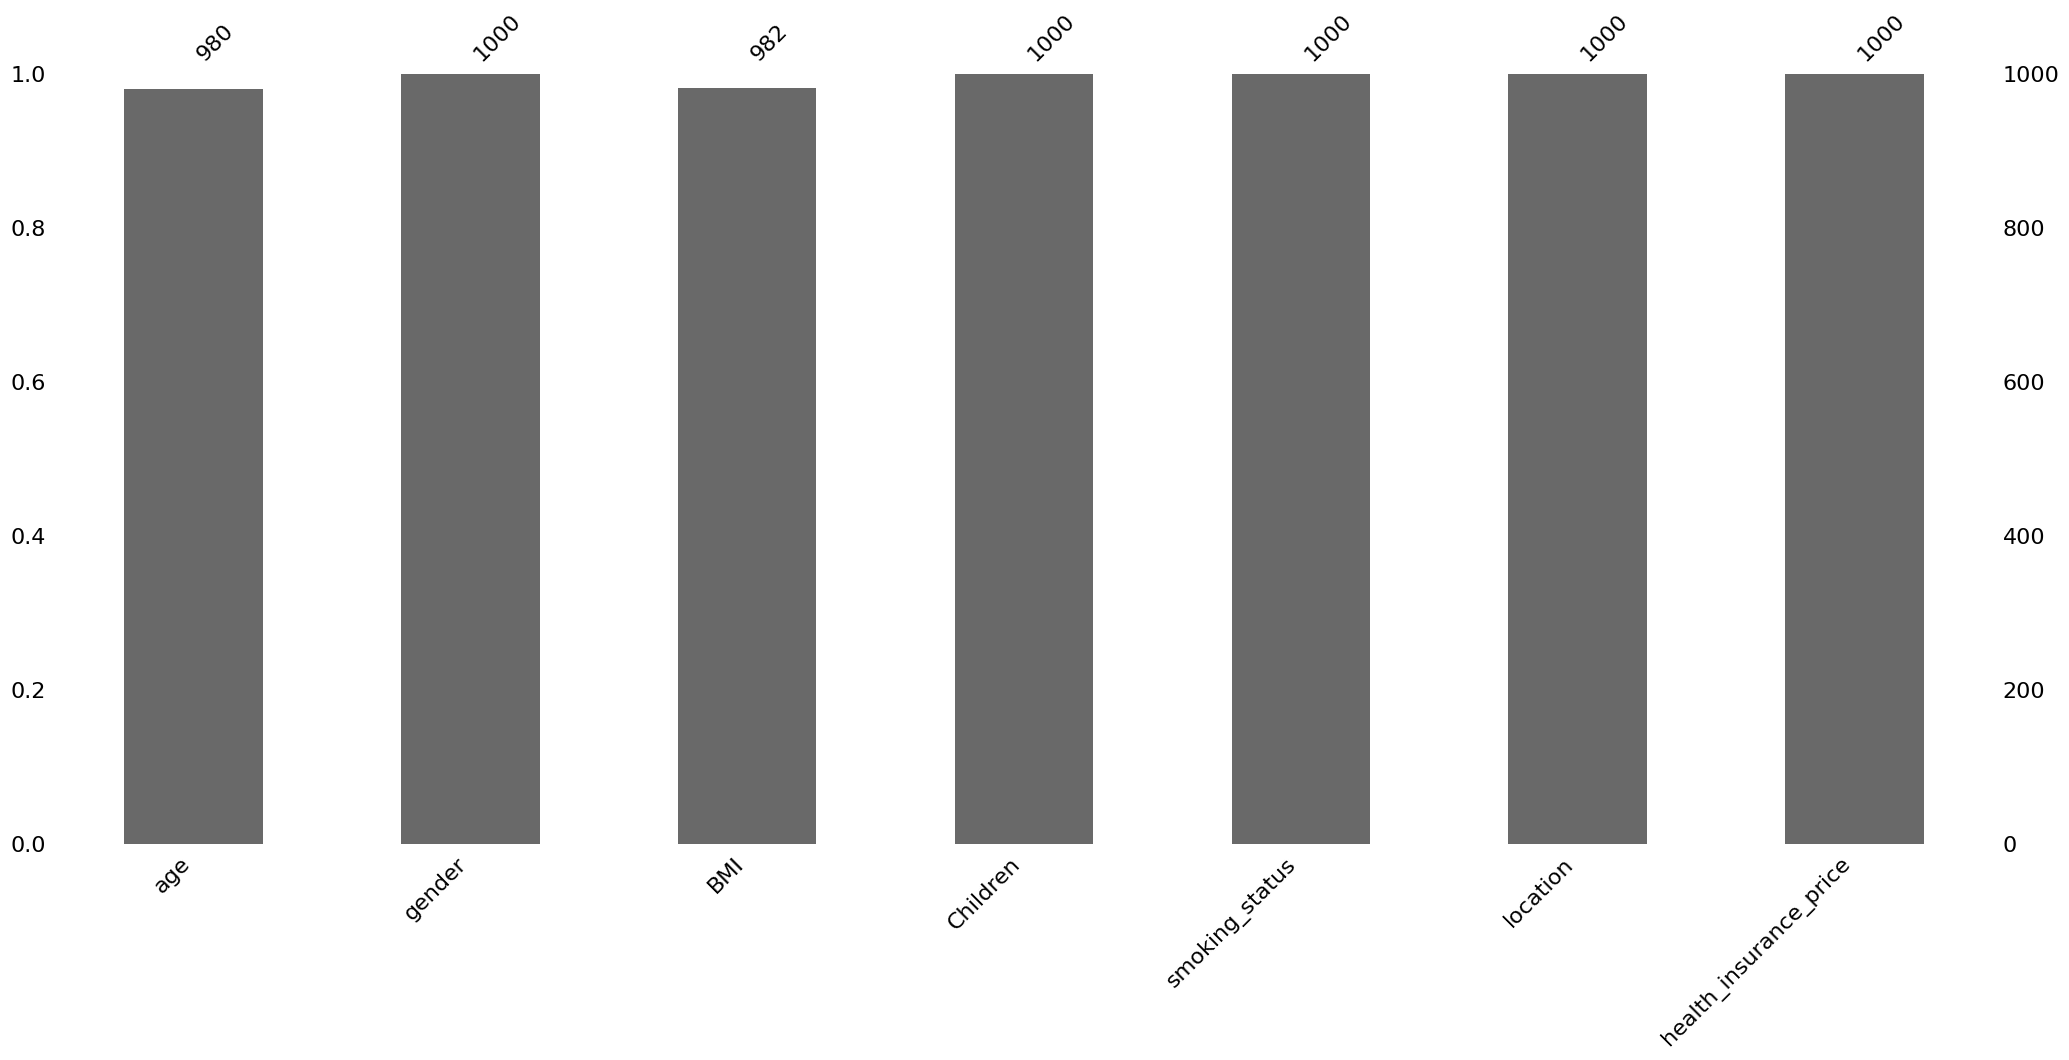

In [ ]:
# bar for simple visualization of null values
msno.bar(data.sample(1000))

<Axes: >

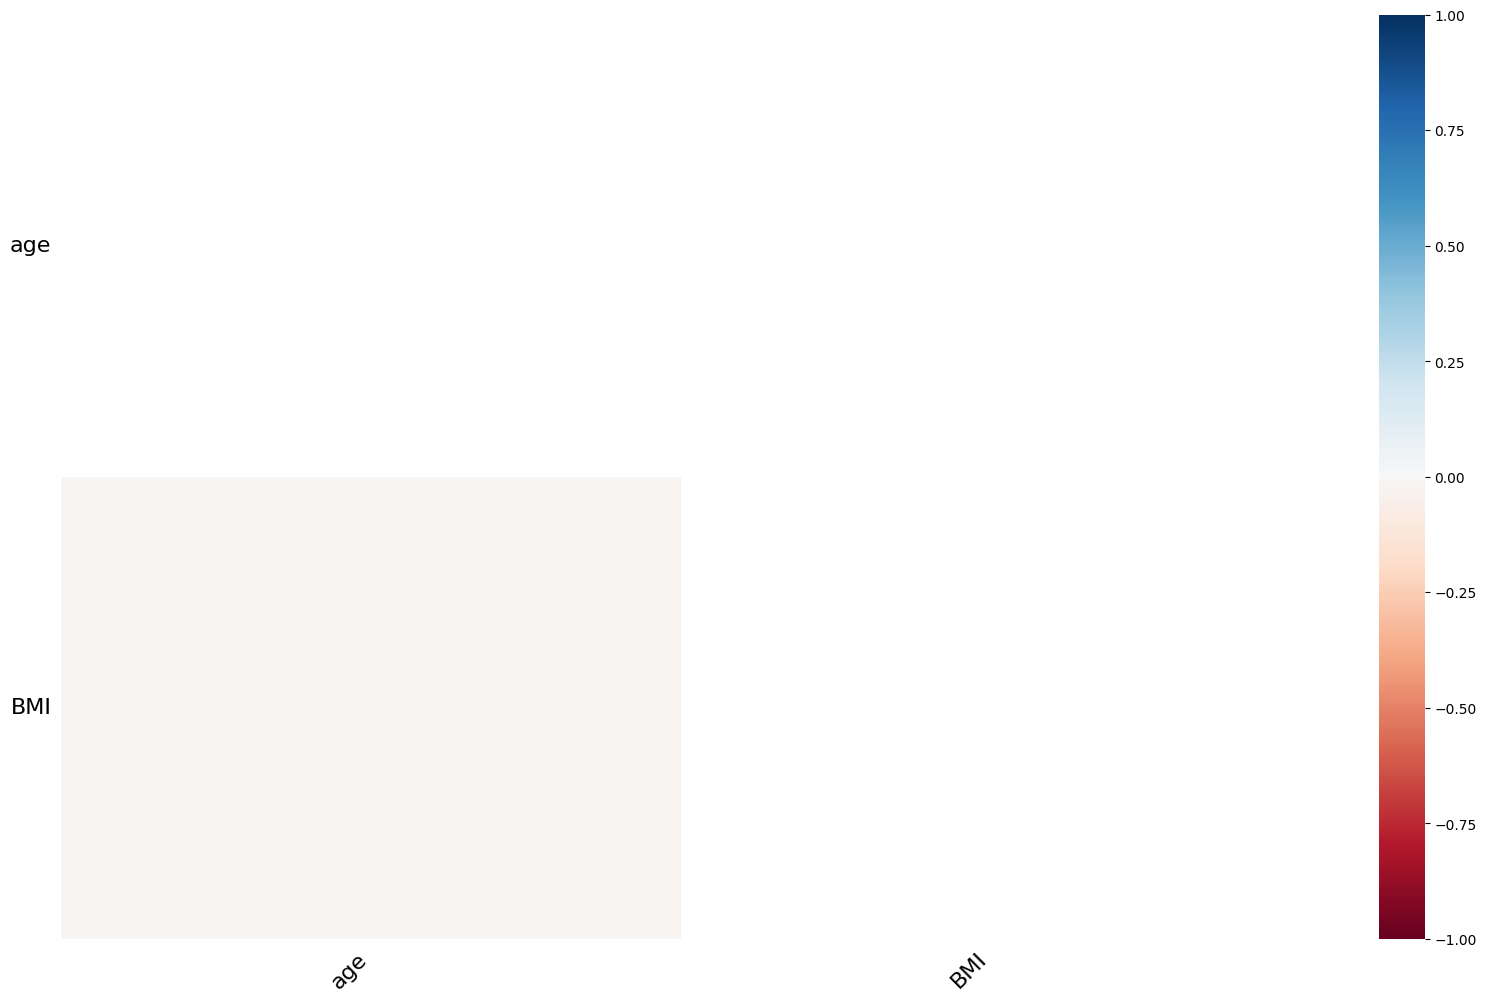

In [ ]:
# to check missing number in heatmap measurea nullity correlation
msno.heatmap(data)

Converting categorial columns into numerical columns

we have 3 featured with string datatypes, as ML algoriths understand only numerical columns so we need to convert these features into numerical data.

In [ ]:
# fetching uniques values of features
print(data['gender'].unique())
print(data['smoking_status'].unique())
print(data['location'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
# encoding gender column
data['gender'] = data['gender'].map({'female' : 0, 'male' : 1})

In [ ]:
# encoding smoking status column
data['smoking_status'] = data['smoking_status'].map({'no' : 0 , 'yes' : 1})

In [ ]:
# encoding location column
data['smoking_status'] = data['smoking_status'].map({'no' : 0 , 'yes' : 1})

In [ ]:
data.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,NaN,0,NaN,southwest,16884.92400
1,18.0,1,33.770,1,NaN,southeast,1725.55230
2,28.0,1,33.000,3,NaN,southeast,4449.46200
3,33.0,1,22.705,0,NaN,northwest,21984.47061
4,32.0,1,28.880,0,NaN,northwest,3866.85520


Imputation of Null Values

Mean imputalion

In [ ]:
from sklearn.impute import SimpleImputer # importing simple imputer
health_mean = data.copy(deep=True) # creating a copy for further evaluation
mean_imputer = SimpleImputer(strategy='mean') # using mean to impute the value

Median impulation

In [ ]:
health_median = data.copy(deep=True) # creating a copy for further evaluation
median_imputer = SimpleImputer(strategy='median') # using median to impute the value

Mode impulation

In [ ]:
health_mode = data.copy(deep=True) # creating a copy for further evaluation
mode_imputer = SimpleImputer(strategy='most_frequent') # using most frequent to impute the value

KNN impulation

In [ ]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.4 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=fe03311e0b2d91787a42c5790fd04dd5e928b14e248067adfc6592e17dea9582
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=348798bf5331aea5c81699fb08e2d2952ee03e2fc8808c6dc365b007011dc9b3
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute import KNN
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'Health_data' is your DataFrame

# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Create separate DataFrames for numeric and categorical columns
data_numeric = data[numeric_columns]
data_categorical = data[categorical_columns]

# One-hot encode categorical columns
data_categorical_encoded = pd.get_dummies(data_categorical, columns=categorical_columns)

# Combine numeric and one-hot encoded categorical DataFrames
data_combined = pd.concat([data_numeric, data_categorical_encoded], axis=1)

# Use KNN imputer on the combined DataFrame
knn_imputer = KNN()
data_imputed = knn_imputer.fit_transform(data_combined)

# Create a new DataFrame with the imputed values
health_knn = pd.DataFrame(data_imputed, columns=data_combined.columns)


Imputing row 1/1336 with 2 missing, elapsed time: 0.321
Imputing row 101/1336 with 1 missing, elapsed time: 0.323
Imputing row 201/1336 with 1 missing, elapsed time: 0.325
Imputing row 301/1336 with 1 missing, elapsed time: 0.327
Imputing row 401/1336 with 1 missing, elapsed time: 0.329
Imputing row 501/1336 with 1 missing, elapsed time: 0.330
Imputing row 601/1336 with 1 missing, elapsed time: 0.332
Imputing row 701/1336 with 1 missing, elapsed time: 0.334
Imputing row 801/1336 with 1 missing, elapsed time: 0.336
Imputing row 901/1336 with 1 missing, elapsed time: 0.338
Imputing row 1001/1336 with 1 missing, elapsed time: 0.340
Imputing row 1101/1336 with 1 missing, elapsed time: 0.342
Imputing row 1201/1336 with 1 missing, elapsed time: 0.344
Imputing row 1301/1336 with 1 missing, elapsed time: 0.345
[KNN] Warning: 1336/13360 still missing after imputation, replacing with 0


Visualising Imputation

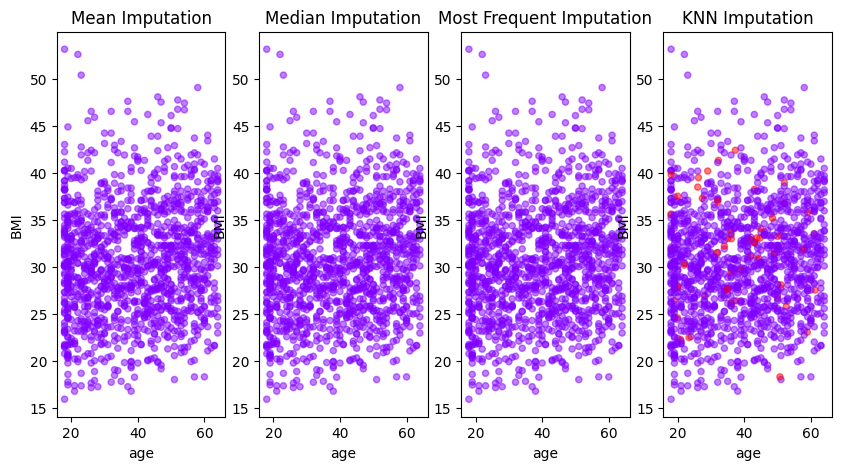

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5)) # creating 2 rows and 3 columns
nullity = data['age'].isnull() + data['BMI'].isnull() # creating null columns between culmen length and culmen depth
imputations = {'Mean Imputation': health_mean, # creating a python dictionary
               'Median Imputation': health_median,
               'Most Frequent Imputation': health_mode,
               'KNN Imputation': health_knn}
# a for loop to iterate over the subplots and the imputed data
for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x='age', y='BMI', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

we can see here that distribution of data after KNN imputation have better

so we can use KNN imputation in our datast

In [ ]:
data = health_knn

In [ ]:
data.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
health_insurance_price    0
location_northeast        0
location_northwest        0
location_southeast        0
location_southwest        0
dtype: int64

In [ ]:
print(data['gender'].value_counts())
print(data['Children'].value_counts())
print(data['smoking_status'].value_counts())

1.0    675
0.0    661
Name: gender, dtype: int64
0.0    574
1.0    323
2.0    239
3.0    157
4.0     25
5.0     18
Name: Children, dtype: int64
0.0    1336
Name: smoking_status, dtype: int64


In [ ]:
data.describe()

,age,gender,BMI,Children,smoking_status,health_insurance_price,location_northeast,location_northwest,location_southeast,location_southwest
count,1336.000000,1336.00000,1336.000000,1336.000000,1336.0,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.120008,0.50524,30.668455,1.094311,0.0,13268.527719,0.242515,0.242515,0.272455,0.242515
std,14.050694,0.50016,6.080632,1.206138,0.0,12112.797724,0.428765,0.428765,0.445389,0.428765
min,18.000000,0.00000,15.960000,0.000000,0.0,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.00000,26.308750,0.000000,0.0,4744.325050,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.00000,30.400000,1.000000,0.0,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.00000,34.585000,2.000000,0.0,16604.302645,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.00000,53.130000,5.000000,0.0,63770.428010,1.000000,1.000000,1.000000,1.000000


Storing independent variable and dependt variables separately

In [ ]:
x = data.drop(['health_insurance_price'], axis = 1)

In [ ]:
x

,age,gender,BMI,Children,smoking_status,location_northeast,location_northwest,location_southeast,location_southwest
0,19.0,0.0,26.427075,0.0,0.0,0.0,0.0,0.0,1.0
1,18.0,1.0,33.770000,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,1.0,33.000000,3.0,0.0,0.0,0.0,1.0,0.0
3,33.0,1.0,22.705000,0.0,0.0,0.0,1.0,0.0,0.0
4,32.0,1.0,28.880000,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1331,50.0,1.0,30.970000,3.0,0.0,0.0,1.0,0.0,0.0
1332,18.0,0.0,31.920000,0.0,0.0,1.0,0.0,0.0,0.0
1333,18.0,0.0,36.850000,0.0,0.0,0.0,0.0,1.0,0.0
1334,21.0,0.0,25.800000,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# target variable
y = data['health_insurance_price']


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1331    10600.54830
1332     2205.98080
1333     1629.83350
1334     2007.94500
1335    29141.36030
Name: health_insurance_price, Length: 1336, dtype: float64

Observation

we cannot able to see any high correlation between any features

we will not remove any feature

Let's test split  

1.  splitting dataset into two parts
2.  train model on training set
3.  test model on testing set  





In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2)  #keeping 20% data for testing , 80% for training.


In [ ]:
print(X.shape,X_train.shape, X_test.shape)

(1336, 9) (1068, 9) (268, 9)


In [ ]:
print(X_train)

       age  gender        BMI  Children  smoking_status  location_northeast  \
644   43.0     1.0  35.310000       2.0             0.0                 0.0   
738   23.0     1.0  31.730000       3.0             0.0                 1.0   
506   22.0     1.0  31.350000       1.0             0.0                 0.0   
37    26.0     1.0  20.800000       0.0             0.0                 0.0   
832   28.0     0.0  23.845000       2.0             0.0                 0.0   
...    ...     ...        ...       ...             ...                 ...   
157   18.0     1.0  25.175000       0.0             0.0                 1.0   
1329  23.0     0.0  33.400000       0.0             0.0                 0.0   
920   62.0     0.0  25.000000       0.0             0.0                 0.0   
489   53.0     1.0  31.160000       1.0             0.0                 0.0   
709   36.0     0.0  26.115384       0.0             0.0                 1.0   

      location_northwest  location_southeast  locat

In [ ]:
print(y_train)

644     18806.14547
738     36189.10170
506      2643.26850
37       2302.30000
832      4719.73655
           ...     
157     15518.18025
1329    10795.93733
920     13451.12200
489     10461.97940
709      5469.00660
Name: health_insurance_price, Length: 1068, dtype: float64


Importing Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

prediction on test data

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'actual' : y_test, 'Lr' : y_pred1,'svm' : y_pred2 , 'rf' : y_pred3 , 'gr' : y_pred4})
df1

,actual,Lr,svm,rf,gr
700,2020.55230,9434.554739,9263.451558,7860.730377,8501.056088
1224,6858.47960,12762.297224,9353.246777,10603.779248,10166.842848
535,6067.12675,13362.831589,9337.408547,15269.288803,11201.604807
1182,2632.99200,7089.228637,9274.242550,10571.258858,7681.680958
324,2866.09100,8697.073808,9290.115241,11114.175292,9868.825888
...,...,...,...,...,...
847,2438.05520,17126.420393,9289.795262,36242.791908,36549.509005
566,6373.55735,14971.014235,9343.978792,17885.614476,10075.002852
497,8027.96800,14108.820605,9378.785994,13270.333935,13096.788274
1055,10594.50155,16002.366472,9432.980443,15681.797348,15211.155949


Comparing performance visually

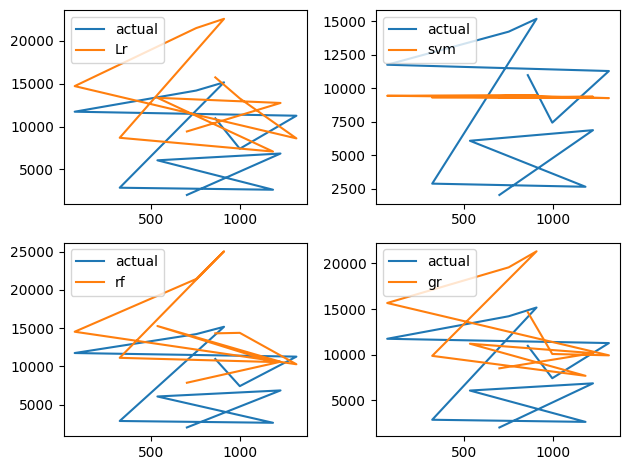

In [ ]:
plt.subplot(221)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['Lr'].iloc[0:11] , label = 'Lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['svm'].iloc[0:11] , label = 'svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['rf'].iloc[0:11] , label = 'rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['gr'].iloc[0:11] , label = 'gr')

plt.tight_layout()
plt.legend()

Evaluating the Algorithum

we will evaluate our model usong r2,r2 is udes to measure the of fit geater the value of r2 better regression model

In [ ]:
#evaluating using metrics
from sklearn import metrics
score1 = metrics.r2_score(y_test , y_pred1)
score2 = metrics.r2_score(y_test , y_pred2)
score3 = metrics.r2_score(y_test , y_pred3)
score4 = metrics.r2_score(y_test , y_pred4)


In [ ]:
print(score1,score2,score3,score4)

0.11202572897043728 -0.09647924902231142 0.024231164351602552 0.03411172615984137


Observation

we can se that model 4 performace is far better that other model so that is gradient bossting alogorithm

In [ ]:
#evaluating using Mean Absolute Error
s1 = metrics.mean_absolute_error(y_test , y_pred1)
s2 = metrics.mean_absolute_error(y_test , y_pred2)
s3 = metrics.mean_absolute_error(y_test , y_pred3)
s4 = metrics.mean_absolute_error(y_test , y_pred4)
print(s1,s2,s3,s4)

9022.665285989235 8567.452084488614 9342.171928586846 9111.720700948137


Observations

Mean Absolute error is also used to measure the accuracy of Model

Here , the lower is better.
we can see here also Model 4(Gradient Boosting Regression Model) is performing better among all Models .
conclusion :

Gradient Boosting Algorithm is giving best results.
So , we will use Gradient Boosting Algorithm for Model Deployment.

Prediciting house insurance price for new customer

In [ ]:
data = {'age' : 50.0,
        'gender' : 1 ,
        'BMI' : 30.97 ,
        'Children' : 3 ,
        'smoking_status' : 0,
        'location' : 3 }

df = pd.DataFrame(data , index = [0])
df


,age,gender,BMI,Children,smoking_status,location
0,50.0,1,30.97,3,0,3


1- Why is this proposal important in today’s world? How predicting a health insurance cost accurately can affect the health care/insurance field?

Health insurance policy is an assurance which provides immediate financial help in case when any medical emergency arises. It is a contract between a policyholder and the insurance company which covers medical expenses that might occur due to illness, injury or accident. If you have a health insurance policy, then some or all the medical expenses will be borne by the insurance company, against which an insured is supposed to pay a certain amount known as premium.

Healthcare expenses are increasing at a rate higher than medical inflation, and that is why it is must for everyone to have a health insurance cover which not only helps you to save your emergency funds and saving of lifetime, in case any medical emergency occurs to you or your near and dear ones, but also supports you to deal with rising medical costs.

Experts believe that a health insurance policy must be a part of your financial planning and it should be purchased early when you are young and responsible to stay safe and secured. Investing in a health insurance plan at an early age also provides other numerous advantages such as better sum insurance coverage, lower premium rates, no medical tests and so on.

Most of the health insurance providers have their own set parameters and based on them they fix the health insurance price. After conducting the research, compiling the historical data and analyzing your customer profile they decide to accept or reject your health insurance application. After assessing the risk factors, the health insurer will send the final quotation. It is important to know that every insurer uses its own assumptions and has its own set of standards while calculating the health insurance premium.

It is very challenging for companies to decide the premium cost and also to accept or reject the application. As , there can be many applicants who can have pre-existing diseases , and if they fail to recognise this and have given insurance to them at low cost then there will be a huge loss for them. So, its very important to predict the premium cost as per the type and health status of applicants. Like , applicants who are smokers , are more likely to have health issues in future , so the premium cost to them must be higher. Premium cost also depends on Age.

2- If any, what is the gap in the knowledge, or how your proposed method can be helpful if required in the future for any other type of insurance?

For Insurance companies it is very difficult task to predict the Insurance Amount. This applies for insurance in every sector. for example : Bike insurance , car insurance , house insurance , death insurance etc. In every sector the problem is same , it is very challenging for companies to finalise the premium cost. It's must be not much higher as when it will be much higher , applicant will not take the policy , it will also be a loss for company. And if , there are pre-existing issues and insurance have been provided by company at lower amount , then it will claim and in this case also there is a loss for company.

Working on this project I have found some parameters on which health insurance price depends , and aable to build a predictor to predict the amount. with this knowledge I can build cost predictor for some other sectors also like automobile , life etc.

3- Please aim to identify patterns in the data and important features that may impact an ML model.

As per my analysis ,

The smoking status of applicant , have a huge impact on the health_insurance_price
Age is also a important factor , as the age increases the health_insurance_price also increases.
